In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-09-01 16:58:54--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.04s   

2024-09-01 16:58:55 (5.56 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
with open('names.txt', 'r') as f:
    names = f.read().splitlines()

In [5]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

### start with bigram model

In [6]:
# bgram model
bigram = {}

for name in names:
    name_li = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(name_li, name_li[1:]):
        bigram[(ch1, ch2)] = bigram.get((ch1, ch2), 0) + 1

In [7]:
bigram = dict(sorted(bigram.items(), key=lambda x: x[1], reverse=True))

In [8]:
for k, v in bigram.items():
    print(k, v)
    if v == 3264:
        break

('n', '<E>') 6763
('a', '<E>') 6640
('a', 'n') 5438
('<S>', 'a') 4410
('e', '<E>') 3983
('a', 'r') 3264


### create a tensor for bigram

In [9]:
# ch to int
chtoint = {ch:i for i,ch in enumerate(sorted(list(set(''.join(names)))))}
chtoint['<S>'] = 26
chtoint['<E>'] = 27


In [10]:
chtoint

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [11]:
import torch

N = torch.zeros((28, 28))

In [12]:
N.dtype

torch.float32

In [13]:
N = N.to(torch.int32) # we are storing counts not floating points

In [14]:
for name in names:
    name_li = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(name_li, name_li[1:]):
        N[chtoint[ch1], chtoint[ch2]] += 1

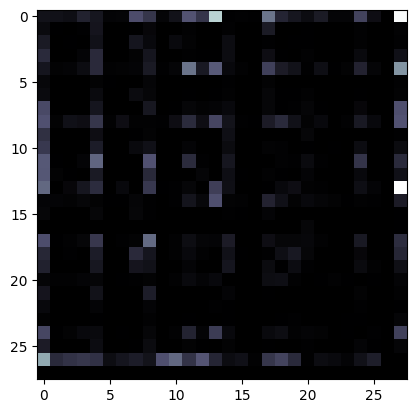

In [15]:
# show it in nicer way
import matplotlib.pyplot as plt
plt.imshow(N, cmap='bone')

(-0.5, 27.5, 27.5, -0.5)

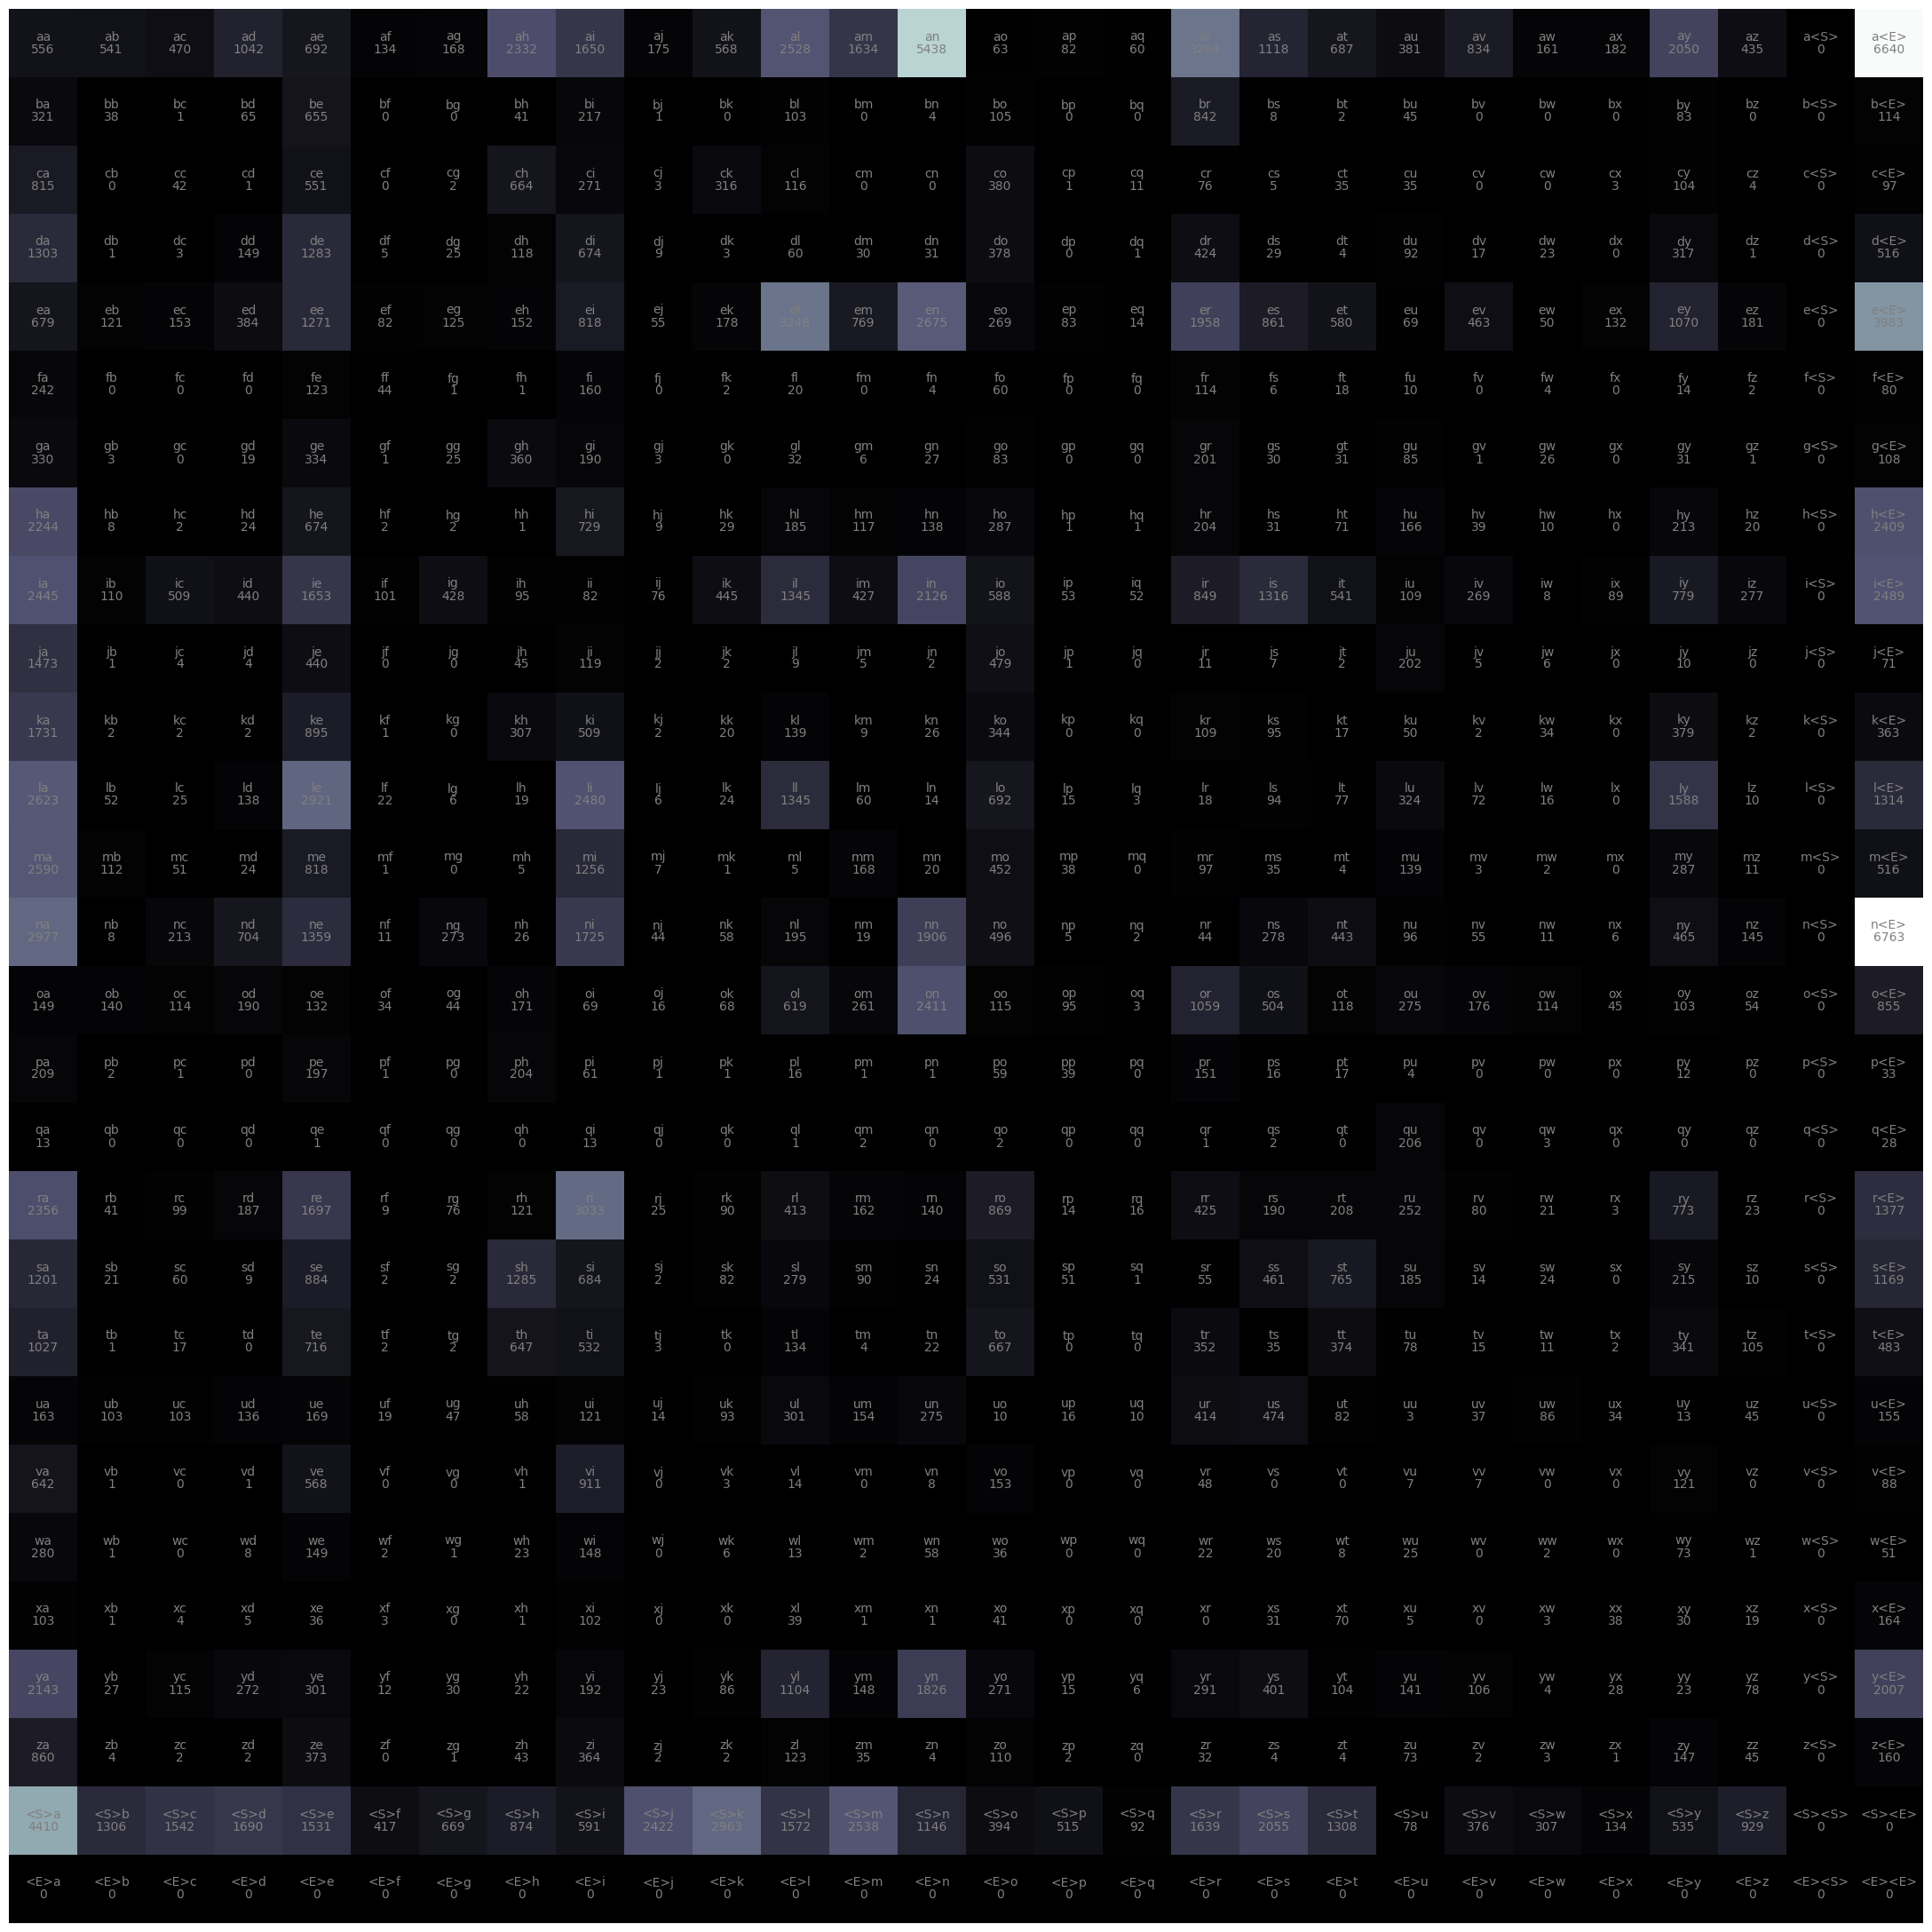

In [16]:
# plot with text
itoch = {i:ch for ch, i in chtoint.items()}

plt.figure(figsize=(28,28))
plt.imshow(N, cmap='bone')
for i in range(28):
    for j in range(28):
        chstr = itoch[i] + itoch[j]
        chcount = N[i, j].item()
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, chcount, ha="center", va="top", color='gray')

plt.axis('off')


### for simplisty use . as spcial charchter

In [17]:
chtoint = {ch:i+1 for i,ch in enumerate(sorted(list(set(''.join(names)))))}
chtoint['.'] = 0

itoch = {i:ch for ch, i in chtoint.items()}

N = torch.zeros((27, 27), dtype=torch.int32)

for name in names:
    name_li = ['.'] + list(name) + ['.']  # i forget to add this as end ch

    for ch1, ch2 in zip(name_li, name_li[1:]):
        N[chtoint[ch1], chtoint[ch2]] += 1


(-0.5, 26.5, 26.5, -0.5)

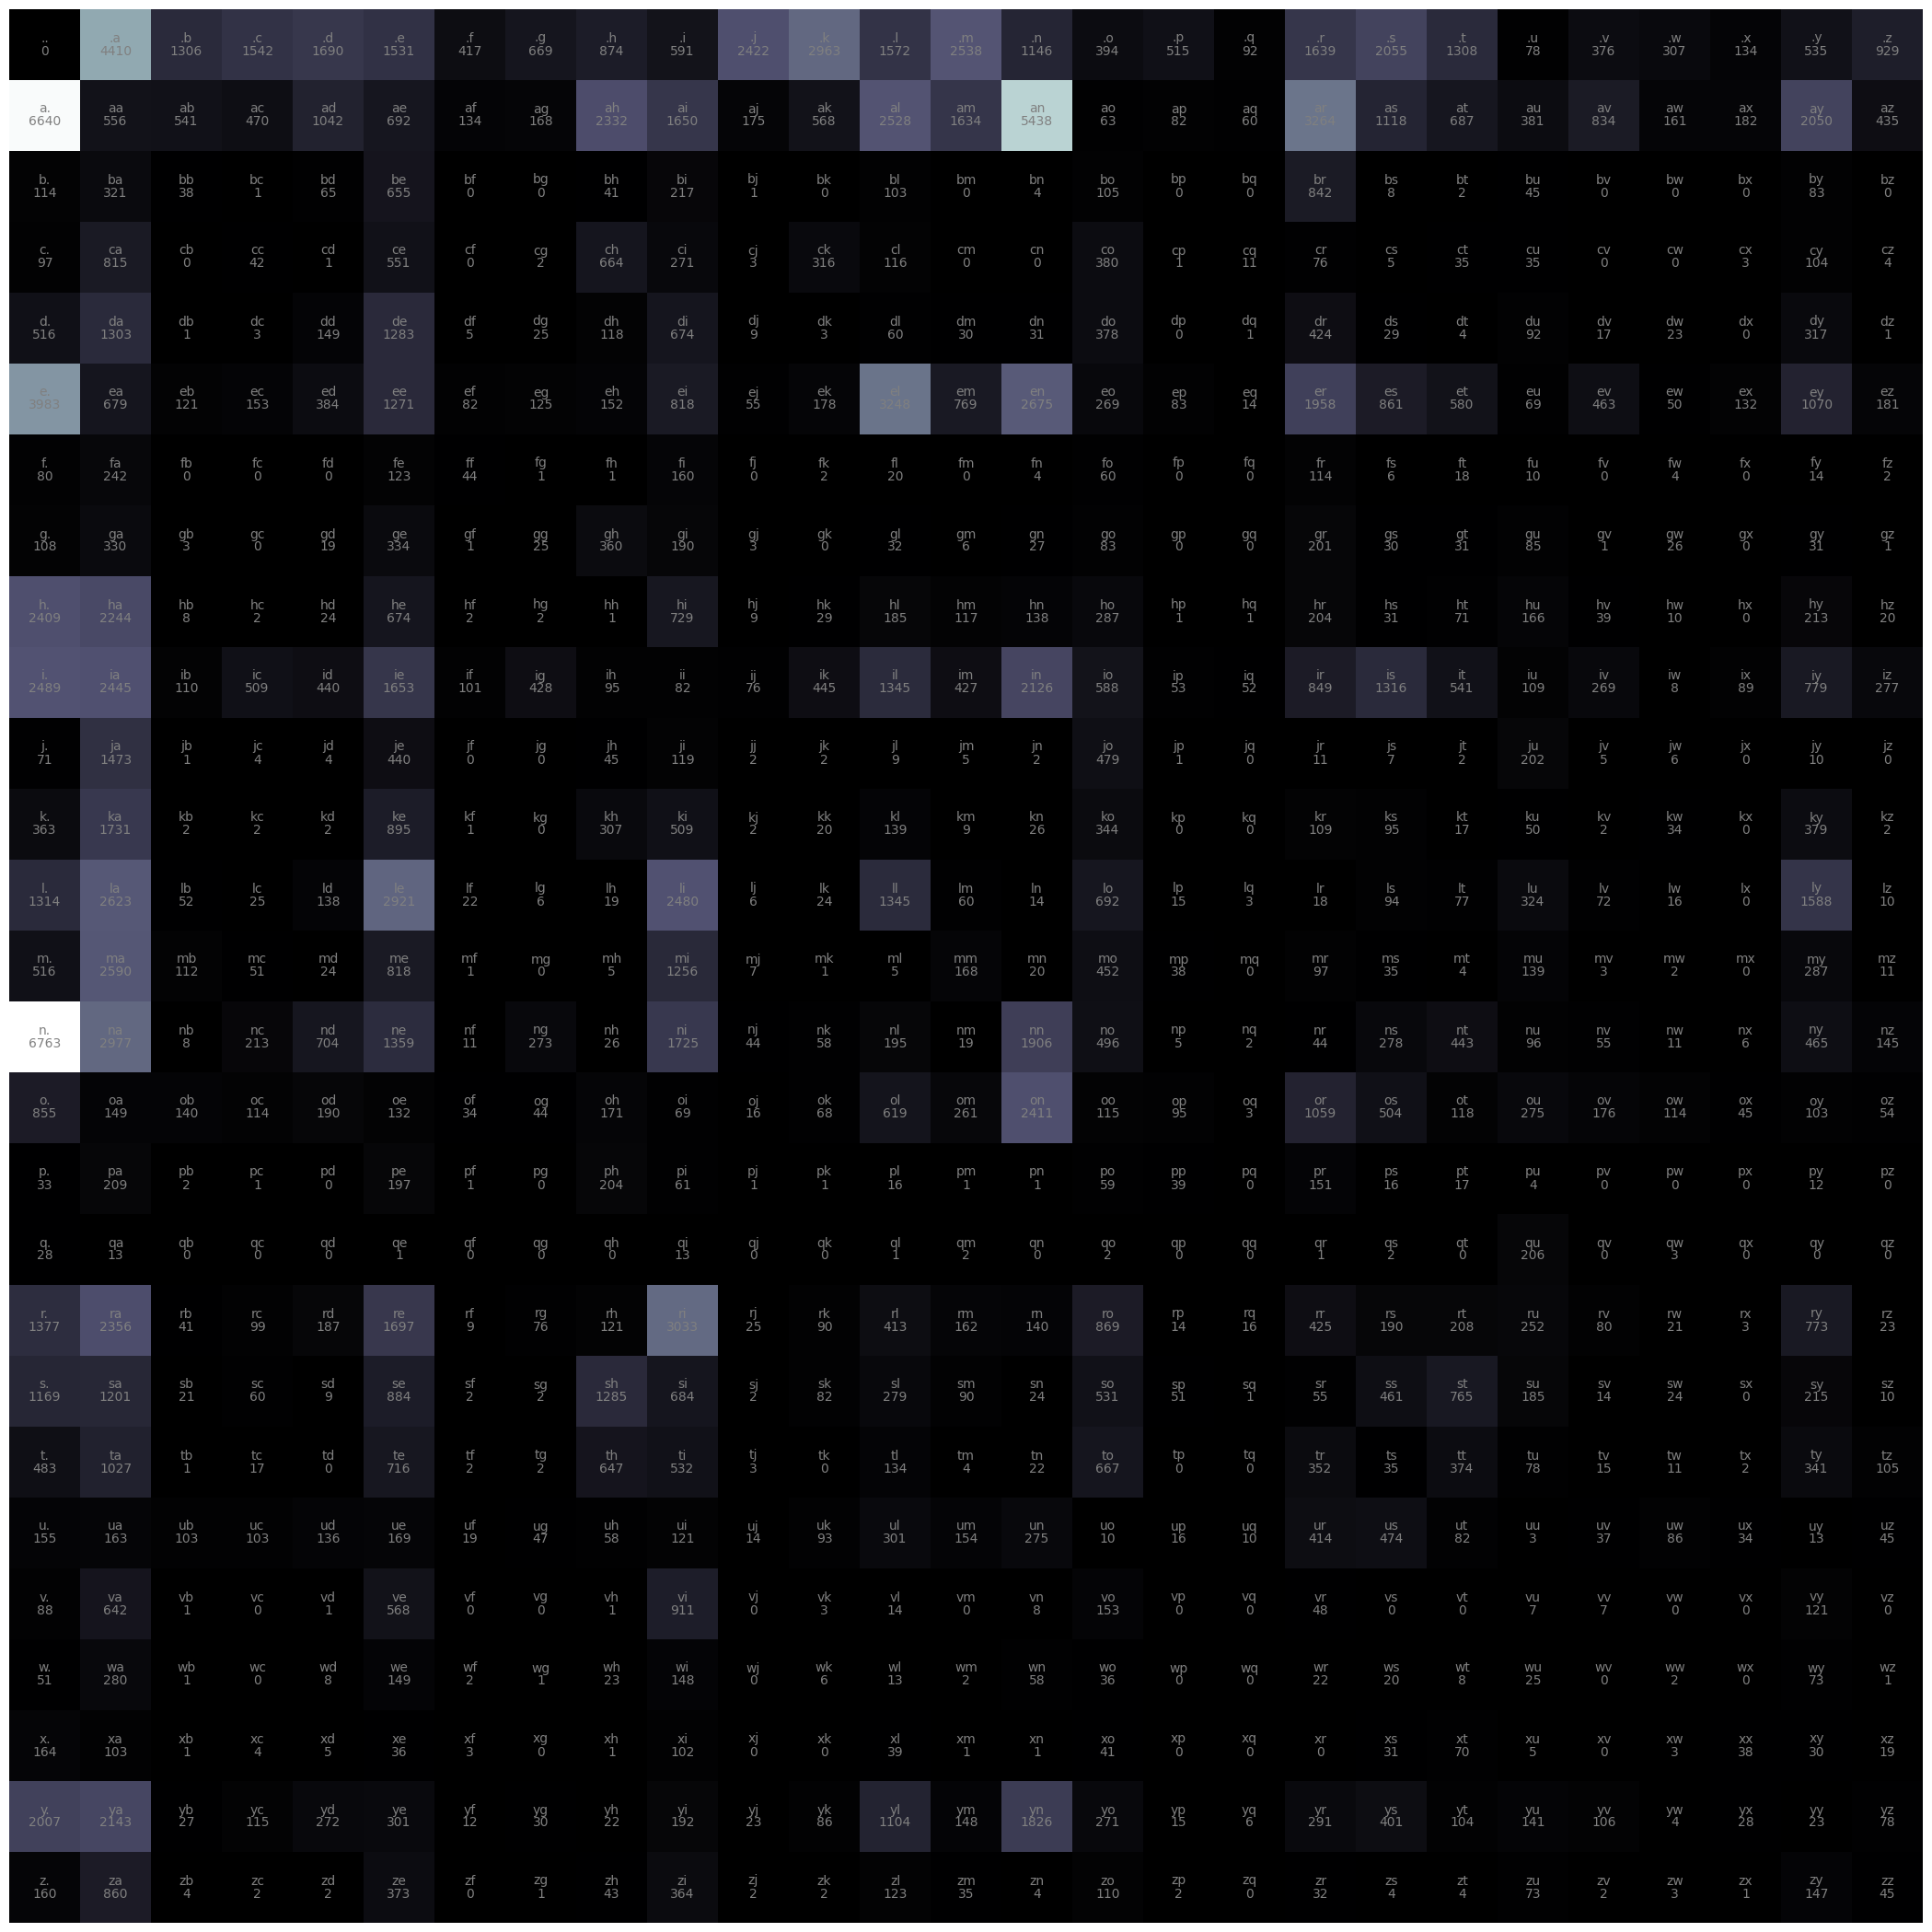

In [18]:
plt.figure(figsize=(27,27))
plt.imshow(N, cmap='bone')
for i in range(27):
  for j in range(27):
    chstr = itoch[i] + itoch[j]
    chcount = N[i, j].item()
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, chcount, ha="center", va="top", color='gray')

plt.axis('off')

### Try to do sampling

mind the differnce

In [19]:
N.sum(), N.sum(1), N.sum(1, keepdim=True)

(tensor(228146),
 tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
          2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
          5570,  3135,  2573,   929,   697,  9776,  2398]),
 tensor([[32033],
         [33885],
         [ 2645],
         [ 3532],
         [ 5496],
         [20423],
         [  905],
         [ 1927],
         [ 7616],
         [17701],
         [ 2900],
         [ 5040],
         [13958],
         [ 6642],
         [18327],
         [ 7934],
         [ 1026],
         [  272],
         [12700],
         [ 8106],
         [ 5570],
         [ 3135],
         [ 2573],
         [  929],
         [  697],
         [ 9776],
         [ 2398]]))

In [20]:
N_props = N / N.sum()

In [21]:
N_props[0]

tensor([0.0000, 0.0193, 0.0057, 0.0068, 0.0074, 0.0067, 0.0018, 0.0029, 0.0038,
        0.0026, 0.0106, 0.0130, 0.0069, 0.0111, 0.0050, 0.0017, 0.0023, 0.0004,
        0.0072, 0.0090, 0.0057, 0.0003, 0.0016, 0.0013, 0.0006, 0.0023, 0.0041])

In [22]:
N_props.dtype

torch.float32

In [23]:
def next_char(ch):
    i = chtoint[ch]
    p = N_props[i]
    i = torch.multinomial(p, num_samples=1).item() # smpling
    next_ch = itoch[i]
    return next_ch


In [24]:
def predict(ch):
  out = ""
  for i in range(10):
    next_ch = next_char(ch)
    out += next_ch
    ch = next_ch
  return out


In [25]:
for i in range(10):
  print(predict("a"))

ynzal.lies
niraheliah
.ghiariach
minaniamit
y.aalfresi
kaby.mit.t
ma.siee.dh
y.arua.cie
.salyn.ayg
n.emeel.ka


### Try again
- i did not get it right.
  - we dont sample from all combinations
  - we sample from a charchter to another

In [26]:
# use generator to get same results with Andrej
g = torch.Generator().manual_seed(2147483647)

In [27]:
p = torch.rand(3, generator=g)
p/p.sum()

tensor([0.6064, 0.3033, 0.0903])

In [28]:
# P = N.float() / N.sum(1, keepdim=True)

In [29]:
P = N.float()
P/= P.sum(1, keepdim=True) # this more effecint, it is an inplace operation which does not create new memory

In [30]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoch[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


#### i want to see how should untraind model look like

In [31]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = torch.ones(27) / 27  # without any training uniform distribution
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoch[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.


### we need to eveluate the model we need to figure out a loss function

In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [56]:
# bigram model parameters are the probalities so we can eveluate like this
import numpy as np
print("our parameters are :")
liklihood = 1
log_liklihood = 0
n = 0
for name in names[:3]:
    name_li = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name_li, name_li[1:]):
      s = ch1 + ch2
      p = P[chtoint[ch1], chtoint[ch2]].item()
      print(s, f"{p:.4f}")
      liklihood *= p
      log_liklihood += np.log(p)
      n += 1
print(f"liklihood is {liklihood} whish is a good estimation for how good the model is, the bigger the better. but it is better to use the log so we can add the logs of p togeather ")
print(f"{log_liklihood=:.3f}")
print(f" {-log_liklihood=:.3f} because loss function is the less the better the oposite of maximum liklihood estimation")
print(f"{-log_liklihood/len(names)=:.3f}")
print(f"average of negative log liklihood ={-log_liklihood/n:.3f}")

our parameters are :
.e 0.0478
em 0.0377
mm 0.0253
ma 0.3899
a. 0.1960
.o 0.0123
ol 0.0780
li 0.1777
iv 0.0152
vi 0.3541
ia 0.1381
a. 0.1960
.a 0.1377
av 0.0246
va 0.2495
a. 0.1960
liklihood is 1.4309086525157158e-17 whish is a good estimation for how good the model is, the bigger the better. but it is better to use the log so we can add the logs of p togeather 
log_liklihood=-38.786
 -log_liklihood=38.786 because loss function is the less the better the oposite of maximum liklihood estimation
-log_liklihood/len(names)=0.001
average of negative log liklihood =2.424


In [95]:
def loss(name):
  name_li = ["."] + list(name) + ["."]
  log_liklihood = 0
  n = 0
  for ch1, ch2 in zip(name_li, name_li[1:]):
    ix1 = chtoint[ch1]
    ix2 = chtoint[ch2]
    prob = P[ix1, ix2]
    print(ch1, ch2, prob)
    logprob = torch.log(prob)
    log_liklihood += logprob
    n += 1
  return -log_liklihood /n

In [96]:
loss("emma"), loss("mahmoud"), loss("andrej"), loss("andrejq") , print(f"we have inf because j q tensor(0.) {np.log(0)=}")

. e tensor(0.0478)
e m tensor(0.0377)
m m tensor(0.0253)
m a tensor(0.3885)
a . tensor(0.1958)
. m tensor(0.0792)
m a tensor(0.3885)
a h tensor(0.0688)
h m tensor(0.0154)
m o tensor(0.0679)
o u tensor(0.0347)
u d tensor(0.0433)
d . tensor(0.0936)
. a tensor(0.1376)
a n tensor(0.1604)
n d tensor(0.0384)
d r tensor(0.0770)
r e tensor(0.1334)
e j tensor(0.0027)
j . tensor(0.0246)
. a tensor(0.1376)
a n tensor(0.1604)
n d tensor(0.0384)
d r tensor(0.0770)
r e tensor(0.1334)
e j tensor(0.0027)
j q tensor(0.0003)
q . tensor(0.0970)
we have inf because j q tensor(0.) np.log(0)=-inf


<ipython-input-96-dc3219c33e30>:1: RuntimeWarning: divide by zero encountered in log
  loss("emma"), loss("mahmoud"), loss("andrej"), loss("andrejq") , print(f"we have inf because j q tensor(0.) {np.log(0)=}")


(tensor(2.5143), tensor(2.7359), tensor(3.0368), tensor(3.4834), None)

this because jq does not exist in our model so we can add fake counts to smooth the model parameters the bigger this count is the smoother is the model

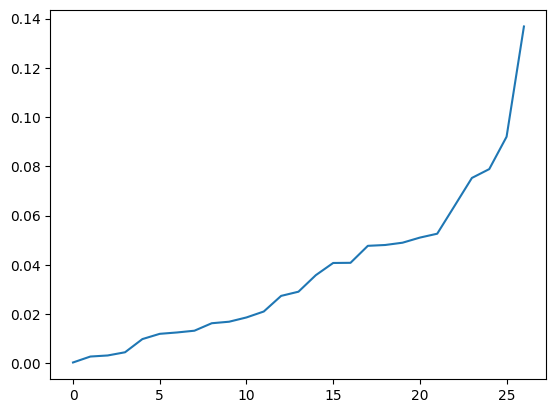

In [91]:
P_s = (N+10).float()
P_s /= P_s.sum(1, keepdim=True)
plt.plot(sorted(P_s[0].flatten()))

In [92]:
N = N + 1
P = N / N.sum(1, keepdim=True)


In [97]:
loss("andrejq")

. a tensor(0.1376)
a n tensor(0.1604)
n d tensor(0.0384)
d r tensor(0.0770)
r e tensor(0.1334)
e j tensor(0.0027)
j q tensor(0.0003)
q . tensor(0.0970)


tensor(3.4834)

### Nueral Net Approach

In [4]:
chtoint = {ch:i+1 for i,ch in enumerate(sorted(list(set(''.join(names)))))}
chtoint['.'] = 0

itoch = {i:ch for ch, i in chtoint.items()}

In [5]:
# for nn we need x, y and wx + b = y
x = []
y = []
for name in names[:1]:
    name_li = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name_li, name_li[1:]):
      ix1 = chtoint[ch1]
      ix2 = chtoint[ch2]
      x.append(ix1)
      y.append(ix2)

In [6]:
x, y

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [7]:
# i can not feed it like this, i need a vector might be one hot or embeddings

In [8]:
import torch
import torch.nn.functional as F

x = torch.tensor(x)
y = torch.tensor(y)
y_true = y.copy_
xenc = F.one_hot(x, num_classes=27).float()  # float because i cant feed int to a nn
yenc = F.one_hot(y, num_classes=27).float()

In [9]:
xenc.shape, yenc.shape

(torch.Size([5, 27]), torch.Size([5, 27]))

In [10]:
# i need to construct a layer with one nueron
w = torch.randn((27, 1))
# b = torch.randn(1)

y = xenc @ w

In [11]:
y.shape # so here i have 5 charchters with one neuron but i am using one hot and to make output layer suits the softmax function i need a layer with 27 nuerons

torch.Size([5, 1])

In [12]:
w = torch.randn((27, 27))
# b = torch.randn(27)
y = xenc @ w

In [13]:
y.shape, y

(torch.Size([5, 27]),
 tensor([[ 0.8626,  0.2408,  0.6493,  0.8954,  0.8782,  1.7675, -1.0875, -0.4096,
          -0.4846,  1.0823, -1.0348, -1.0836, -0.3677, -0.1421, -0.8274, -1.1837,
           2.1514, -2.2403,  0.8400,  0.6594, -1.3161, -0.7202, -2.2914,  0.7236,
           0.1443, -0.7418,  0.2352],
         [-0.5991,  1.4681,  0.0922, -1.9083, -0.3236, -0.3958,  0.3612, -1.1810,
          -1.1347,  0.9971, -0.1198,  0.7965, -0.7973, -1.0654, -0.6038, -0.6140,
          -0.7732,  0.6999,  0.5120, -0.9263,  1.5619,  0.9188, -0.8075,  1.3953,
           0.9492,  1.2330, -1.9724],
         [-1.7329, -0.5111,  1.6507,  0.3558,  0.9404,  0.2960,  0.0854,  0.0921,
          -0.2039,  1.6625, -0.0182, -1.7335, -0.9589, -0.7310,  0.6296, -0.9869,
          -0.1168, -0.4376, -1.9240, -0.5795, -1.2013,  1.0153, -0.6455, -0.3960,
           0.3731, -1.3590, -1.1829],
         [-1.7329, -0.5111,  1.6507,  0.3558,  0.9404,  0.2960,  0.0854,  0.0921,
          -0.2039,  1.6625, -0.0182, -1.7335

In [14]:
y[3,13] # third x charater with the 13th neuron

tensor(-0.7310)

In [15]:
el_wise = xenc[3] * w[13]
el_wise.sum() # same with y[3,13]

tensor(-0.7310)

In [16]:
# so now we can intrpret these numbers as a logits , log of counts to get the supposed counts i can use exp
y.exp() # i get just postive numbers but i need probalities which sum to 1
y.exp() / y.exp().sum(1, keepdim=True) # which is now a softmax

tensor([[0.0556, 0.0299, 0.0449, 0.0575, 0.0565, 0.1375, 0.0079, 0.0156, 0.0145,
         0.0693, 0.0083, 0.0079, 0.0163, 0.0204, 0.0103, 0.0072, 0.2018, 0.0025,
         0.0544, 0.0454, 0.0063, 0.0114, 0.0024, 0.0484, 0.0271, 0.0112, 0.0297],
        [0.0138, 0.1092, 0.0276, 0.0037, 0.0182, 0.0169, 0.0361, 0.0077, 0.0081,
         0.0682, 0.0223, 0.0558, 0.0113, 0.0087, 0.0138, 0.0136, 0.0116, 0.0507,
         0.0420, 0.0100, 0.1200, 0.0631, 0.0112, 0.1016, 0.0650, 0.0863, 0.0035],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0116, 0.0029,

In [17]:
F.softmax(y, dim=1) # same as above

tensor([[0.0556, 0.0299, 0.0449, 0.0575, 0.0565, 0.1375, 0.0079, 0.0156, 0.0145,
         0.0693, 0.0083, 0.0079, 0.0163, 0.0204, 0.0103, 0.0072, 0.2018, 0.0025,
         0.0544, 0.0454, 0.0063, 0.0114, 0.0024, 0.0484, 0.0271, 0.0112, 0.0297],
        [0.0138, 0.1092, 0.0276, 0.0037, 0.0182, 0.0169, 0.0361, 0.0077, 0.0081,
         0.0682, 0.0223, 0.0558, 0.0113, 0.0087, 0.0138, 0.0136, 0.0116, 0.0507,
         0.0420, 0.0100, 0.1200, 0.0631, 0.0112, 0.1016, 0.0650, 0.0863, 0.0035],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0116, 0.0029,

In [18]:
# if i want to create a loss so we can how good this model parameter is
logits = y # y.exp() / y.exp().sum(1, keepdim=True)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [19]:
probs.shape, probs[0].sum()

(torch.Size([5, 27]), tensor(1.0000))

In [20]:
yenc.shape

torch.Size([5, 27])

In [21]:
probs[0][yenc[0].argmax()] # the outputed probabliity

tensor(0.1375)

In [22]:
probs[0] @ yenc[0]

tensor(0.1375)

In [23]:
probs[0].shape, yenc[0].shape

(torch.Size([27]), torch.Size([27]))

In [24]:
# i can ger probs to logits then get negative likelihood
(-probs.log() * yenc).sum(1) # loss for every one


tensor([1.9843, 4.7479, 4.2086, 3.9887, 4.4571])

In [25]:
(-probs.log() * yenc).sum(1).sum()/5 # loss

tensor(3.8773)

In [26]:
F.cross_entropy(logits, yenc) # same

tensor(3.8773)

### Full process

In [27]:
# for nn we need x, y and wx + b = y
x = []
y = []
for name in names:
    name_li = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(name_li, name_li[1:]):
      ix1 = chtoint[ch1]
      ix2 = chtoint[ch2]
      x.append(ix1)
      y.append(ix2)

In [28]:
xenc = F.one_hot(torch.tensor(x), num_classes=27).float()
yenc = F.one_hot(torch.tensor(y), num_classes=27).float()

w = torch.randn((27, 27), requires_grad=True)
# b = torch.randn(27)
y = xenc @ w
# logits = y # y.exp() / y.exp().sum(1, keepdim=True)
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)

### Try training

In [29]:
def cross_entropy_loss(logits, yenc):
    return (-logits * yenc).sum(1).mean()

In [30]:
def softmax(logits):
    return logits.exp() / logits.exp().sum(1, keepdim=True)

In [31]:
softmax(logits)

tensor([[0.0556, 0.0299, 0.0449, 0.0575, 0.0565, 0.1375, 0.0079, 0.0156, 0.0145,
         0.0693, 0.0083, 0.0079, 0.0163, 0.0204, 0.0103, 0.0072, 0.2018, 0.0025,
         0.0544, 0.0454, 0.0063, 0.0114, 0.0024, 0.0484, 0.0271, 0.0112, 0.0297],
        [0.0138, 0.1092, 0.0276, 0.0037, 0.0182, 0.0169, 0.0361, 0.0077, 0.0081,
         0.0682, 0.0223, 0.0558, 0.0113, 0.0087, 0.0138, 0.0136, 0.0116, 0.0507,
         0.0420, 0.0100, 0.1200, 0.0631, 0.0112, 0.1016, 0.0650, 0.0863, 0.0035],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0055, 0.0185, 0.1609, 0.0441, 0.0791, 0.0415, 0.0336, 0.0339, 0.0252,
         0.1628, 0.0303, 0.0055, 0.0118, 0.0149, 0.0580, 0.0115, 0.0275, 0.0199,
         0.0045, 0.0173, 0.0093, 0.0852, 0.0162, 0.0208, 0.0448, 0.0079, 0.0095],
        [0.0116, 0.0029,

In [32]:
cross_entropy_loss(softmax(logits).log(), yenc)

RuntimeError: The size of tensor a (5) must match the size of tensor b (228146) at non-singleton dimension 0

In [51]:
for i in range (1000):
    # forward pass
    logits = xenc @ w
    loss = cross_entropy_loss(softmax(logits).log(), yenc) # loss which try to make all probabilities workout
    + (0.1*(w**2).mean()) # addtional component tries to make all ws be zero because if w is zero the smaller gets the loss so wights dont get very big- it is adding a spring force to force it be zero
    print("loss : " ,loss.item())

    # backward pass
    w.grad = None
    loss.backward()

    # update
    w.data += -20 * w.grad




loss :  2.454925775527954
loss :  2.454925298690796
loss :  2.454925060272217
loss :  2.454925060272217
loss :  2.4549245834350586
loss :  2.4549241065979004
loss :  2.4549238681793213
loss :  2.454923629760742
loss :  2.454923391342163
loss :  2.454923152923584
loss :  2.454922676086426
loss :  2.4549224376678467
loss :  2.4549221992492676
loss :  2.4549219608306885
loss :  2.4549217224121094
loss :  2.454921245574951
loss :  2.454920768737793
loss :  2.454920768737793
loss :  2.4549202919006348
loss :  2.4549202919006348
loss :  2.4549198150634766
loss :  2.4549195766448975
loss :  2.4549195766448975
loss :  2.45491886138916
loss :  2.45491886138916
loss :  2.454918384552002
loss :  2.454918146133423
loss :  2.4549176692962646
loss :  2.4549176692962646
loss :  2.4549171924591064
loss :  2.4549169540405273
loss :  2.4549167156219482
loss :  2.454916477203369
loss :  2.454916000366211
loss :  2.454916000366211
loss :  2.454915761947632
loss :  2.4549152851104736
loss :  2.454915046691

In [41]:
w.grad[0,1] + -0.1  ,w.grad[0,1]

(tensor(-0.1177), tensor(-0.0177))

In [50]:
loss,(w**2).mean(), loss + (0.1*(w**2).mean())

(tensor(2.4549, grad_fn=<MeanBackward0>),
 tensor(3.4792, grad_fn=<MeanBackward0>),
 tensor(2.8028, grad_fn=<AddBackward0>))

In [185]:
cross_entropy_loss(softmax(logits).log(), yenc)

tensor(nan, grad_fn=<MeanBackward0>)

In [184]:
(-softmax(logits).log()* yenc).sum(1).mean()

tensor(3.7404, grad_fn=<MeanBackward0>)

### sampling from the model

In [84]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
for i in range(10):
  while True:
    xenc = F.one_hot(torch.tensor(ix), num_classes=27).float()
    logits = xenc @ w
    p = softmax(logits.reshape(1,-1))

    # sampling from the probablity distrubution
    ix = torch.multinomial(p, num_samples=1,generator = g).item()
    print(itoch[ix],end="")
    if ix == 0:
      break
  print("\n...............")


junide.
...............
janasah.
...............
p.
...............
cony.
...............
a.
...............
nn.
...............
kohin.
...............
tolian.
...............
juee.
...............
ksahnaauranilevias.
...............


In [72]:
xenc  ix = 0
  ix = 0
  ix = 0
  ix = 0
(softmax(logits.reshape(1,-1))).argmax().item()

SyntaxError: invalid syntax (<ipython-input-72-5513d617bba4>, line 1)

tensor(1)